# Modelling:


In this notebook, we will focus on building machine learning models to predict house prices using the preprocessed Ames housing dataset. The steps will involve the following:

* Splitting the Data:
First, we will split the dataset into training and testing sets using train_test_split to ensure we can evaluate our model on unseen data.

* Log Transformation of SalePrice:
We will apply a log transformation to the SalePrice target variable to stabilize variance and normalize the distribution. We’ll then compare model performance using log-transformed values and untransformed values of SalePrice.

* Testing Different Models:
We will train and test multiple models without hyperparameter tuning, including Linear Regression, Random Forest, and Gradient Boosting, and evaluate their performance based on the $R^2$ score. This will allow us to assess which model works best for this dataset.

* Hyperparameter Tuning:
After identifying the best-performing model, we will use GridSearchCV or RandomizedSearchCV to fine-tune the hyperparameters and further improve the model’s performance.

* Model Evaluation:
We will evaluate the final model using a variety of metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared. These metrics will help us compare our tuned model to the baseline and ensure that our adjustments lead to better performance.


Let's import our libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_style("whitegrid")

In [2]:
## Import dataframe

df = pd.read_csv('data/Ames_Housing_Encoded.csv')
df.head()

,Unnamed: 0,Order,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,cat__Sale Condition_Partial,cat__Heating_GasW,cat__Heating_Other,Township,Section,Block,Total_Porch_Area,Total_Living_Area,Has_Pool,Total_Bathrooms
0,0,1,20,141.0,31770,2,6,5,1960,1960,...,0.0,0.0,0.0,52,63,11,62,2295.0,False,1.5
1,1,2,20,80.0,11622,1,5,6,1961,1961,...,0.0,0.0,0.0,52,63,500,120,1508.0,False,1.0
2,2,3,20,81.0,14267,2,6,6,1958,1958,...,0.0,0.0,0.0,52,63,510,36,2252.0,False,1.5
3,3,4,20,93.0,11160,1,7,5,1968,1968,...,0.0,0.0,0.0,52,63,530,0,3175.0,False,3.0
4,4,5,60,74.0,13830,2,5,5,1997,1998,...,0.0,0.0,0.0,52,71,50,34,2420.0,False,2.5


### Applying Log Transformation:

When we did some EDA on our dataset we found that most of the correlated features have an exponential relationship with`SalePrice`.Hence we split our data let's apply a Log Transformation to our `SalePrice`. 

We can create a plot to look at the distribution before and after applying log transformation.

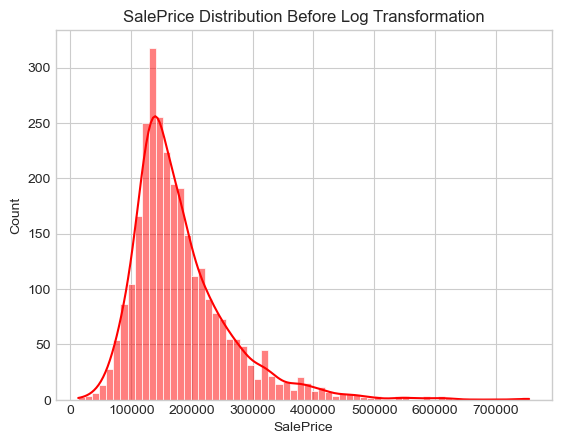

In [3]:
sns.histplot(df['SalePrice'], kde=True, color = 'r')
plt.title("SalePrice Distribution Before Log Transformation")
plt.show()

In [4]:
df['SalePrice'] = np.log(df['SalePrice'])

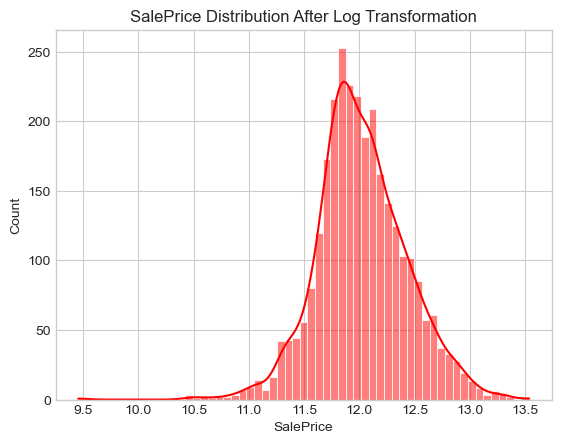

In [5]:
sns.histplot(df['SalePrice'], kde=True, color = 'r')
plt.title("SalePrice Distribution After Log Transformation")
plt.show()

## Splitting our data

In [6]:
X = df.drop(columns = ['SalePrice'])
y = df['SalePrice']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=46
                                                )

In [8]:
# Create eval function the competion using Root mean squared log error

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a func to evaluate model on few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_test, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_test, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_test, val_preds)
    }
    return scores

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR

# Define a dictionary of models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
}

# Dictionary to store model results
model_scores = {}

# Loop through models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train model
    model_scores[name] = show_scores(model)  # Evaluate model

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(model_scores)

Training RandomForest...
Training SVR...
Training Ridge...
Training Lasso...


C:\learning-progress\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.849e+00, tolerance: 3.971e-02
  model = cd_fast.enet_coordinate_descent(


In [10]:
results_df.T


,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2
RandomForest,0.033915,0.086306,0.004076,0.010039,0.984418,0.891898
SVR,0.151277,0.150353,0.016640,0.016395,0.732191,0.709309
Ridge,0.079637,0.082294,0.009281,0.009104,0.916811,0.911470
Lasso,0.094625,0.087178,0.011533,0.009783,0.869657,0.897411


## Evaluation of models:

From this we can see that RandomForest and Ridge perfoms the best on our dataset. However there is one major issue:

* **Overfitting** : When we look at the Validation $R^2$ we can clearly see that our model is overfitting to the training dataset. The model gets an 98% $R^2$ on our training data but an 89% on our validation data. But our Ridge model performs pretty well overall.

To overcome this issue we will use hyperparameter tuning on both our models and then see which models gives us the best prediction.

## Tuning our RandomForestModel: 

For tuning our `RandomForestRegrssor` model we will change the following parameters:

* `n_estimators`: This is the number of trees in the model, the more trees the higher number of nodes the more stable and less the noise. This reduces variance.

* `max_depth`: The maximum depth of the tree. This paramter controls the depth of each individual tree.

* `min_samples_split`: This controls the minimum number of samples required to split an internal node.

* `min_samples_leaf`: It controls the minimum number of samples required to be at a leaf node.

* `max_features`: The max_features parameter in a decision tree or ensemble methods like Random Forest controls the maximum number of features (variables) that the model considers when looking for the best split at each node.

Let's pass all these through a RandomizedSearchCV to tune it!

In [11]:
random_forest_grid = {
    'n_estimators': np.arange(50, 2000, 50),  
    'max_depth': [None, 3, 5, 7, 10, 15, 20],  
    'min_samples_split': np.arange(2, 40, 2), 
    'min_samples_leaf': np.arange(1, 40, 2),  
    'max_features': ['sqrt', 'log2', None],  
}

In [12]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

np.random.seed(42)
rs_rfr_grid = RandomizedSearchCV(RandomForestRegressor(), param_distributions= random_forest_grid, cv = 5, n_iter = 20, verbose = True)
rs_rfr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10, 15,
                                                      20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38]),
                                        'n_estimators': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100,
       1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650,
       1700, 1750, 1800, 1850, 1900, 1950])},
                   verbose=True)

### Tuning our Ridge model:

For tuning our ridge model we will use the following paramter:

* `alpha`: In Ridge the alpha paramter controls the strength of our regularization penalty, which helps prevent overfitting. It basically penalizes large coefficients in the model and brings it closer to 0.

Let's tune the model!

In [13]:
ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
np.random.seed(42)
ridge_param_model = RandomizedSearchCV(Ridge(), param_distributions= ridge_param_grid, cv =5 , n_iter = 20, verbose = True)
ridge_param_model.fit(X_train, y_train)

C:\learning-progress\env\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 7 is smaller than n_iter=20. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100]},
                   verbose=True)

In [14]:
rs_rfr_grid.best_params_

{'n_estimators': 1450,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 15}

In [15]:
ridge_param_model.best_params_

{'alpha': 10}

### Post tuning:

Now that we have tuned the data let's apply the best paramters to our test data and evalutate our model

In [16]:
ideal_rf_model = RandomForestRegressor(**rs_rfr_grid.best_params_)
ideal_rf_model.fit(X_train, y_train)
rf_metrics = pd.DataFrame(show_scores(ideal_rf_model))

{'Training MAE': 0.04404680918021579,
 'Valid MAE': 0.08692202115596394,
 'Training RMSLE': 0.005669302366261596,
 'Valid RMSLE': 0.010177794276849908,
 'Training R^2': 0.9701032670593721,
 'Valid R^2': 0.8892390107923498}

In [ ]:
rf_metrics

In [17]:
ideal_ridge_model = Ridge(alpha = 10)
ideal_ridge_model.fit(X_train, y_train)
ridge_metrics = pd.DataFrame(show_scores(ideal_ridge_model))

{'Training MAE': 0.07982179158396967,
 'Valid MAE': 0.07900757739134745,
 'Training RMSLE': 0.009520555646120919,
 'Valid RMSLE': 0.008791177963745267,
 'Training R^2': 0.912519068634691,
 'Valid R^2': 0.9172837765813929}

In [ ]:
ridge_metrics

## Model Evaluation and Comparison

After tuning both models and checking the evaluation metrics, it looks like the **Ridge Regression** model performs better than the **Random Forest** model on most of the **validation metrics**. Since we care more about how the model performs on new data, we’ll focus on the validation results.

### 📊 Validation Scores

| Metric              | Random Forest       | Ridge Regression     |
|---------------------|---------------------|----------------------|
| **MAE**             | 0.0869              | **0.0790**         |
| **RMSLE**           | 0.0102              | **0.0088**         |
| **R² Score**        | 0.8892              | **0.9173**          |

### 📝 Observations

- **MAE**: Ridge has a lower MAE, so it’s making smaller average errors.
- **RMSLE**: Ridge also performs better when we care about relative/percentage differences.
- **R²**: Ridge explains more of the variance in the validation set.

Also, the Random Forest model does really well on the training data but not as well on the validation set, which means it might be overfitting a bit. Ridge, on the other hand, is more consistent between training and validation.

### ✅ Final Thoughts

Even though Random Forest is a powerful model, **Ridge Regression** is more reliable in this case. It's simpler, less likely to overfit, and does better on the validation set. So we’ll go with Ridge for our final model.


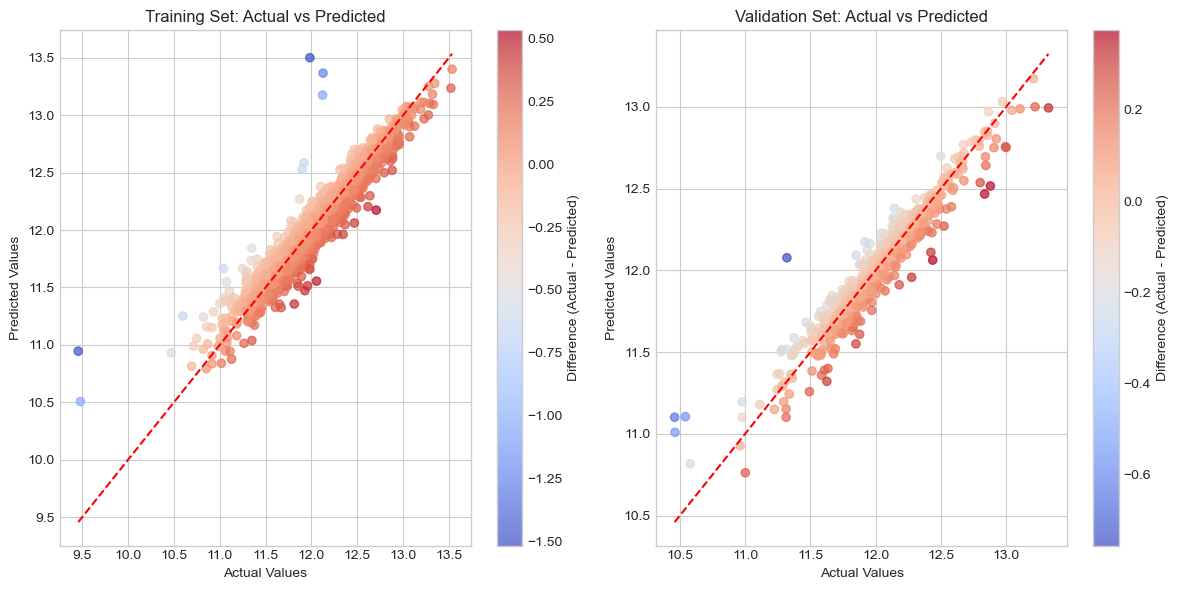

In [27]:

# Predictions
y_train_pred = ideal_ridge_model.predict(X_train)
y_valid_pred = ideal_ridge_model.predict(X_test)

# Calculate differences
train_diff = y_train - y_train_pred
valid_diff = y_test - y_valid_pred

# Plot
plt.figure(figsize=(12, 6))

# Training data (Actual vs Predicted)
plt.subplot(1, 2, 1)
scatter = plt.scatter(y_train, y_train_pred, c=train_diff, cmap='coolwarm', alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  # Diagonal line
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.colorbar(scatter, label='Difference (Actual - Predicted)')

# Validation data (Actual vs Predicted)
plt.subplot(1, 2, 2)
scatter = plt.scatter(y_test, y_valid_pred, c=valid_diff, cmap='coolwarm', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Validation Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.colorbar(scatter, label='Difference (Actual - Predicted)')

plt.tight_layout()
plt.show()


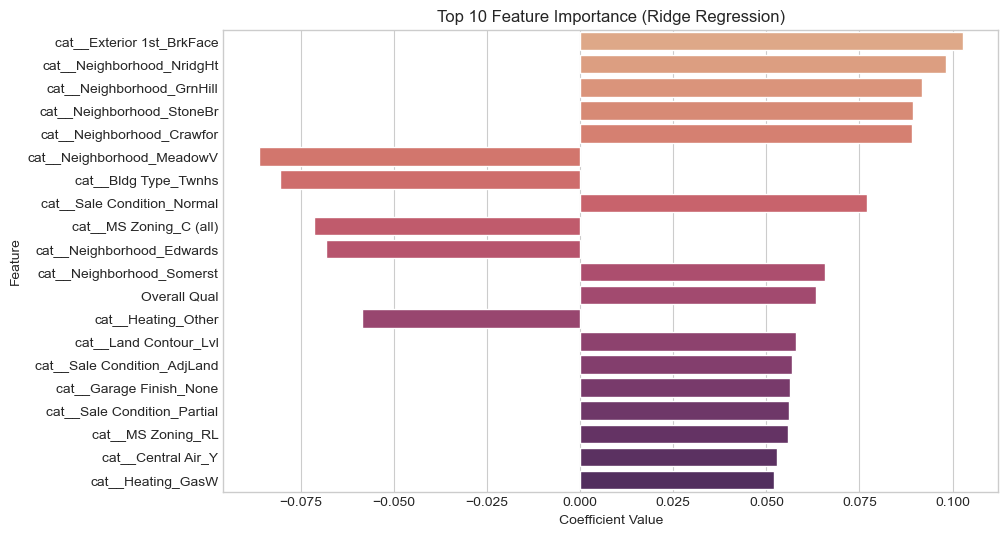

In [50]:
# Get the feature names (assuming you have them in X_train)
feature_names = X_train.columns

# Get the coefficients from the Ridge model
coefficients = ideal_ridge_model.coef_

# Create a DataFrame for easier visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to see which features are most important
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 features
top_10_coef_df = coef_df.head(30)

# Plot the top 10 features importance with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_coef_df['Coefficient'], y=top_10_coef_df['Feature'], palette='flare', hue = top_10_coef_df['Feature'])

# Add titles and labels
plt.title('Top 10 Feature Importance (Ridge Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.show()


## Feature Importance Analysis (Ridge Regression)

### Top 10 Features

| Feature | Coefficient | Absolute Coefficient |
| --- | --- | --- |
| `cat__Exterior 1st_BrkFace` | 0.102846 | 0.102846 |
| `cat__Neighborhood_NridgHt` | 0.098230 | 0.098230 |
| `cat__Neighborhood_GrnHill` | 0.091726 | 0.091726 |
| `cat__Neighborhood_StoneBr` | 0.089383 | 0.089383 |
| `cat__Neighborhood_Crawfor` | 0.089178 | 0.089178 |
| `cat__Neighborhood_MeadowV` | -0.086281 | 0.086281 |
| `cat__Bldg Type_Twnhs` | -0.080639 | 0.080639 |
| `cat__Sale Condition_Normal` | 0.077114 | 0.077114 |
| `cat__MS Zoning_C (all)` | -0.071499 | 0.071499 |
| `cat__Neighborhood_Edwards` | -0.068099 | 0.068099 |

### Key Observations:

1. **Neighborhood Location**: 
   - The top features positively influencing house prices are **neighborhoods**. 
     - For example, neighborhoods like `NridgHt`, `GrnHill`, `StoneBr`, and `Crawfor` have positive coefficients, indicating that houses in these areas tend to have higher prices.
     - In contrast, neighborhoods such as `MeadowV` and `Edwards` have negative coefficients, suggesting lower prices in these areas.
   
2. **Building Material and Sale Condition**: 
   - **Exterior Material**: The feature `cat__Exterior 1st_BrkFace` (brick face) has a positive coefficient, indicating that houses with a brick exterior tend to be more expensive.
   - **Sale Condition**: The feature `cat__Sale Condition_Normal` has a positive coefficient, meaning that properties sold under normal conditions are associated with higher prices compared to those sold in distressed conditions.
   
3. **Building Type**: 
   - The feature `cat__Bldg Type_Twnhs` (townhouse) has a **negative** coefficient, suggesting that townhouses tend to have lower prices compared to other property types like single-family homes.

4. **Zoning**: 
   - The feature `cat__MS Zoning_C (all)` has a **negative** coefficient, indicating that properties with this zoning type may have lower prices. This could reflect less demand for properties in these zones, possibly due to commercial use or other factors.

## Conclusion

In this project, we applied various data analysis techniques to the **Ames Housing Dataset** to predict house prices effectively. The following steps were key to improving the model's performance:

1. **Data Cleaning**:
   - We handled **missing values** by carefully cleaning columns with **null** entries, ensuring the dataset was complete and ready for analysis.
   - We transformed categorical features into usable formats, including **one-hot encoding** and simple **mapping**, which helped improve the model’s understanding of categorical variables.

2. **Feature Engineering**:
   - We performed **exploratory data analysis (EDA)** to better understand the relationships between features and the target variable. Through this, we identified and created new features, such as extracting **geographic features** from the PID (Parcel Identification) to enrich the dataset.
   - We combined **redundant features** and eliminated less important ones to focus on those that contributed significantly to the prediction, such as **neighborhood**, **building type**, and **sale condition**.

3. **Feature Importance**:
   - Using **Ridge regression**, we identified the most influential features for predicting house prices. **Neighborhood**, **building material** (e.g., brick face), and **sale condition** emerged as the top contributors. On the other hand, certain features like **townhouses** and specific neighborhoods (e.g., `MeadowV` and `Edwards`) had a negative impact on house prices.
   - By sorting features by **absolute coefficient values**, we gained insights into the model's behavior and which factors had the strongest influence.

4. **Modeling**:
   - We implemented **Ridge regression**, a regularized linear model, to make price predictions. The model was trained on a clean and well-processed dataset, with features engineered to highlight the most important variables.
   - We evaluated performance using the **train and validation sets**, and the model demonstrated robust predictive capabilities with reasonable residuals.

5. **Final Thoughts**:
   - The model's ability to predict house prices was greatly enhanced by the deep feature engineering and the extraction of unique features like **PID**-based geographic insights.
   - The importance of **location** (neighborhood) in determining house prices was reaffirmed, along with the influence of **building characteristics** (e.g., brick face and zoning).
   - This analysis not only provided valuable insights into the Ames Housing market but also demonstrated key practices in **feature selection**, **data cleaning**, and **model interpretation**.